In [2]:
!pip install mysql-connector-python
!pip install matplotlib
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mydb = mysql.connector.connect(host = "127.0.0.1", user = "root",
passwd = "*Attitude@271302", database = "bbms")
mycursor = mydb.cursor()

In [6]:
mycursor.execute('select * from analysis')

for i in mycursor:
    print(i)

(Decimal('0'), 'Good', Decimal('3'), Decimal('32'), Decimal('24'), Decimal('86'), Decimal('2'), Decimal('0'), Decimal('0'))
(Decimal('1'), 'Good', Decimal('2'), Decimal('64'), Decimal('60'), Decimal('41'), Decimal('69'), Decimal('6841'), Decimal('2166'))
(Decimal('3'), 'Bad', Decimal('14'), Decimal('69'), Decimal('89'), Decimal('77'), Decimal('19'), Decimal('776'), Decimal('888'))
(Decimal('4'), 'Good', Decimal('2'), Decimal('45'), Decimal('66'), Decimal('33'), Decimal('10'), Decimal('4'), Decimal('2'))
(Decimal('5'), 'Good', Decimal('12'), Decimal('23'), Decimal('53'), Decimal('69'), Decimal('73'), Decimal('84'), Decimal('64'))
(Decimal('6'), 'Good', Decimal('10'), Decimal('97'), Decimal('82'), Decimal('4'), Decimal('26'), Decimal('936484'), Decimal('5251996'))
(Decimal('9'), 'Good', Decimal('7'), Decimal('45'), Decimal('12'), Decimal('86'), Decimal('89'), Decimal('576438'), Decimal('3579575'))
(Decimal('15'), 'Bad', Decimal('6'), Decimal('69'), Decimal('56'), Decimal('100'), Decimal(

<AxesSubplot:xlabel='Blood_group'>

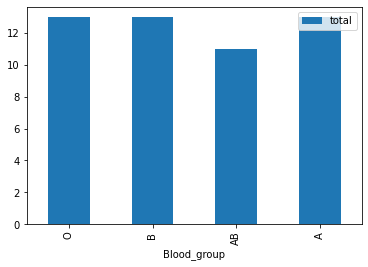

In [9]:
A = pd.read_sql_query('''select Blood_group,count(Blood_group) as total 
from blood group by Blood_group''',mydb)

dataf = pd.DataFrame(A,columns = ['Blood_group','total'])
dataf.plot(x='Blood_group',y='total',kind='bar')


<AxesSubplot:xlabel='Blood_type'>

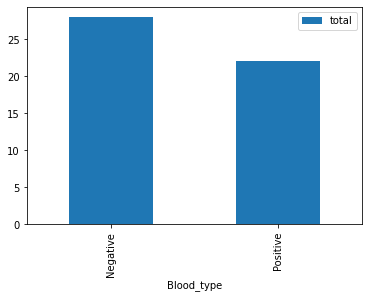

In [10]:
A = pd.read_sql_query('''select Blood_type,count(Blood_type) as total 
from blood group by Blood_type;''',mydb)

dataf = pd.DataFrame(A,columns = ['Blood_type','total'])
dataf.plot(x='Blood_type',y='total',kind='bar')

<AxesSubplot:ylabel='total'>

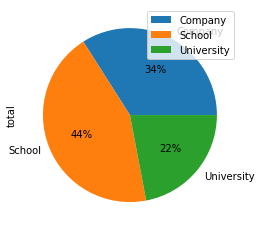

In [18]:
A = pd.read_sql_query(''' select Event_type,count(Event_type) as total 
from events group by Event_type;''',mydb)

dataf = pd.DataFrame(A,columns = ['Event_type','total'])

dataf.groupby(['Event_type']).sum().plot(
    kind='pie', y='total', autopct='%1.0f%%')


<AxesSubplot:xlabel='Bloodbank_id'>

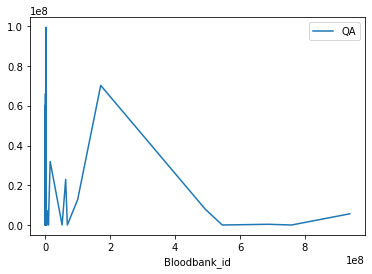

In [20]:
A = pd.read_sql_query('''select Bloodbank_id,Quantity_available as QA from bloodbanks''',mydb)
dataf = pd.DataFrame(A,columns = ['Bloodbank_id','QA'])
dataf.plot(x='Bloodbank_id',y='QA')